In [38]:
import nltk
from nltk import CFG
from nltk.parse import ChartParser
from nltk import Tree

# This code tries to model the following relation:

### E1+E2+E3+E4+E5 -> E5+E3+E1

# 1) Build CFG to parse passive sentences

In [39]:
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    PP -> P NP
    NP -> Det N
    VP -> V PP              
    V -> Aux VV
    Aux -> 'was'
    VV -> 'kept'
    Det -> 'The' | 'the'
    N -> 'landlord' | 'deposit'
    P -> 'by'
    """)

parser = ChartParser(grammar)

sent = "The deposit was kept by the landlord".split()

for tree in parser.parse(sent):
    tree = tree

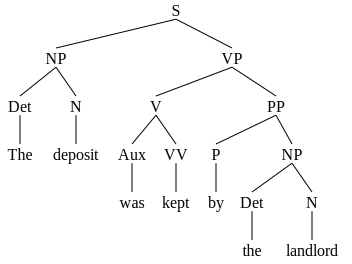

In [40]:
tree

# 2) Apply a series of extractions:

This will help us get the subtrees in the plot as follows:

1. NP -> The deposit
2. V -> was kept
3. VV -> kept
4. PP -> by the landlord
5. NP -> the landlord

In [41]:
def extract_subtrees(tree, labels):
    extracted = []
    for subtree in tree:
        if type(subtree) is Tree and subtree.label() in labels:
            extracted.append(subtree)
    return extracted

# Labels to extract
labels_to_extract = ['NP', 'VP']

# Extract subtrees
extracted_subtrees = extract_subtrees(tree, labels_to_extract)

for subtree in extracted_subtrees:
    print(subtree)
    print()



(NP (Det The) (N deposit))

(VP (V (Aux was) (VV kept)) (PP (P by) (NP (Det the) (N landlord))))



In [42]:
# Extract subtrees
y = Tree.fromstring("""(VP (V (Aux was) (VV kept)) (PP (P by) (NP (Det the) (N landlord))))""")
xxx = ['PP', 'V']
extracted_subtrees = extract_subtrees(y, xxx)
# Labels to extract

# Print extracted subtrees
for subtree in extracted_subtrees:
    print(subtree)
    print()

(V (Aux was) (VV kept))

(PP (P by) (NP (Det the) (N landlord)))



In [43]:
# Create the parse tree
parse_tree = Tree.fromstring("""
(S
  (NP (Det The) (N deposit))
  (VP
    (V (Aux was) (VV kept))
    (PP (P by) (NP (Det the) (N landlord)))))
""")

# Function to extract all subtrees
def extract_subtrees(tree):
    subtrees = []
    for subtree in tree.subtrees():
        subtrees.append(subtree)
    return subtrees

# Extract all subtrees
all_subtrees = extract_subtrees(parse_tree)

# Print all subtrees
z = {}
for i, subtree in enumerate(all_subtrees):
    z[f"Subtree {i}:"] = subtree
    # print(f"Subtree {i}:")
    # print(subtree)
    # #print()

z


{'Subtree 0:': Tree('S', [Tree('NP', [Tree('Det', ['The']), Tree('N', ['deposit'])]), Tree('VP', [Tree('V', [Tree('Aux', ['was']), Tree('VV', ['kept'])]), Tree('PP', [Tree('P', ['by']), Tree('NP', [Tree('Det', ['the']), Tree('N', ['landlord'])])])])]),
 'Subtree 1:': Tree('NP', [Tree('Det', ['The']), Tree('N', ['deposit'])]),
 'Subtree 2:': Tree('Det', ['The']),
 'Subtree 3:': Tree('N', ['deposit']),
 'Subtree 4:': Tree('VP', [Tree('V', [Tree('Aux', ['was']), Tree('VV', ['kept'])]), Tree('PP', [Tree('P', ['by']), Tree('NP', [Tree('Det', ['the']), Tree('N', ['landlord'])])])]),
 'Subtree 5:': Tree('V', [Tree('Aux', ['was']), Tree('VV', ['kept'])]),
 'Subtree 6:': Tree('Aux', ['was']),
 'Subtree 7:': Tree('VV', ['kept']),
 'Subtree 8:': Tree('PP', [Tree('P', ['by']), Tree('NP', [Tree('Det', ['the']), Tree('N', ['landlord'])])]),
 'Subtree 9:': Tree('P', ['by']),
 'Subtree 10:': Tree('NP', [Tree('Det', ['the']), Tree('N', ['landlord'])]),
 'Subtree 11:': Tree('Det', ['the']),
 'Subtree 12

In [44]:
# Labels to look for
labels = ['NP', 'VV', 'V', 'PP']

# Extracting only the subtrees with the specified labels
filtered_subtrees = {key: val for key, val in z.items() if val.label() in labels}

# for key, subtree in filtered_subtrees.items():
#     print(f"{key}:")
#     print(subtree)
#     print()

q = []
for k, v in z.items():
    if v.label() in labels:
        q.append(v)

q


[Tree('NP', [Tree('Det', ['The']), Tree('N', ['deposit'])]),
 Tree('V', [Tree('Aux', ['was']), Tree('VV', ['kept'])]),
 Tree('VV', ['kept']),
 Tree('PP', [Tree('P', ['by']), Tree('NP', [Tree('Det', ['the']), Tree('N', ['landlord'])])]),
 Tree('NP', [Tree('Det', ['the']), Tree('N', ['landlord'])])]

# 3) Assign IDs 

In [45]:
def assign_ids(filtered_subtrees):
    id = 1
    res = []
    for k, v in filtered_subtrees.items():
        new = {}
        new[f"ID{id}"] = v
        res.append(new)
        id += 1
    return res

res = assign_ids(filtered_subtrees)
res

[{'ID1': Tree('NP', [Tree('Det', ['The']), Tree('N', ['deposit'])])},
 {'ID2': Tree('V', [Tree('Aux', ['was']), Tree('VV', ['kept'])])},
 {'ID3': Tree('VV', ['kept'])},
 {'ID4': Tree('PP', [Tree('P', ['by']), Tree('NP', [Tree('Det', ['the']), Tree('N', ['landlord'])])])},
 {'ID5': Tree('NP', [Tree('Det', ['the']), Tree('N', ['landlord'])])}]

# 4) Rearrange

- This models the following -> The landlord kept the deposit.

In [22]:
def rearrange_dict_list(dict_list, order):
   
    id_to_dict = {list(d.keys())[0]: d for d in dict_list}
    rearranged_list = [id_to_dict[id_key] for id_key in order if id_key in id_to_dict]
    return rearranged_list


# The desired order
desired_order = ['ID5', 'ID3', 'ID1']

# Rearranging the dictionary
rearranged_dict_list = rearrange_dict_list(res, desired_order)
rearranged_dict_list


[{'ID5': 'Tree("NP", [Tree("Det", ["the"]), Tree("N", ["landlord"])])'},
 {'ID3': 'Tree("VV", ["kept"])'},
 {'ID1': 'Tree("NP", [Tree("Det", ["The"]), Tree("N", ["deposit"])])'}]

In [50]:
def output(dict_list):
   
    trees = []
    for item in dict_list:
        tree_str = list(item.values())[0]
        tree = eval(tree_str)
        trees.append(tree)
    return trees

active = output(rearranged_dict_list)
active = [i.leaves() for i in active]
active = [item for sublist in active for item in sublist]
active = " ".join(active).lower()
active


'the landlord kept the deposit'